In [1]:
import sys
sys.path.insert(0, '..')

In [98]:
# Basic imports
import jax.numpy as np
import jax.random as jr
import jax.scipy as jsp
import jax
import numpy

#jax.config.update("jax_enable_x64", True)

# Optimisation imports
import zodiax as zdx
import optax

# dLux imports
import dLux as dl
import dLux.utils as dlu

# Visualisation imports
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 72

from detectors import *
from apertures import *
from models import *
from fisher import *
from stats import posterior

%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 72
plt.rcParams["font.size"] = 24

def set_array(pytree):
    dtype = np.float64 if jax.config.x64_enabled else np.float32
    floats, other = eqx.partition(pytree, eqx.is_inexact_array_like)
    floats = jtu.tree_map(lambda x: np.array(x, dtype=dtype), floats)
    return eqx.combine(floats, other)

In [3]:
wid = 80
oversample = 4

optics = NICMOSOptics(512, wid, oversample)

detector = NICMOSDetector(oversample, wid)

# n458
data = '../data/MAST_2024-09-19T06_48_02.332Z/HST/'

# n581
data = '../data/MAST_2024-09-23T06_53_22.463Z/HST/'

#hyades
data = '../data/MAST_2024-09-26T22_53_13.719Z/HST/'

data = '../data/MAST_2024-09-27T00_15_31.056Z/HST/'

files = """
na2a04maq_cal.fits
na2a04mbq_cal.fits
na2a04meq_cal.fits
na2a04mgq_cal.fits
na2a04mjq_cal.fits
na2a04mlq_cal.fits
na2a04moq_cal.fits
na2a04mqq_cal.fits
na2a04mtq_cal.fits
na2a04mvq_cal.fits
na2a04myq_cal.fits
na2a04n0q_cal.fits
na2a04n3q_cal.fits
na2a04n5q_cal.fits
na2a04n8q_cal.fits
na2a04naq_cal.fits
na2a04ndq_cal.fits
na2a04neq_cal.fits
""".split()


exposures = [

    # N458
    #exposure_from_file(data+'na2a05ttq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a05tuq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05txq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05tzq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05u2q_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05u4q_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05u7q_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05u9q_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05ueq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05uhq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05ujq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05umq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05uoq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05urq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05utq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05uwq_cal.fits", SinglePointFit(), crop=wid),
    #exposure_from_file(data+"na2a05uxq_cal.fits", SinglePointFit(), crop=wid),


    # N581
    #exposure_from_file(data+'na2a04maq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mbq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04meq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mgq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mjq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mlq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04moq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mqq_cal.fits', SinglePointFit(), crop=wid),


    #exposure_from_file(data+'na2a04mcq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mdq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04mhq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a04miq_cal.fits', SinglePointFit(), crop=wid),


    exposure_from_file(data+'na2a08phq_cal.fits', SinglePointFit(), crop=wid),
    exposure_from_file(data+'na2a08piq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a26f7q_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a26faq_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a02b6q_cal.fits', SinglePointFit(), crop=wid),
    #exposure_from_file(data+'na2a02b8q_cal.fits', SinglePointFit(), crop=wid),
]

exposures = [exposure_from_file(data+f, SinglePointFit(), crop=wid) for f in files]#[:18]

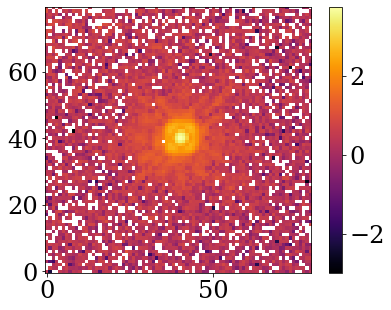

In [4]:
n = 0
plt.imshow(np.log10(exposures[n].data/exposures[n].err))
plt.colorbar()

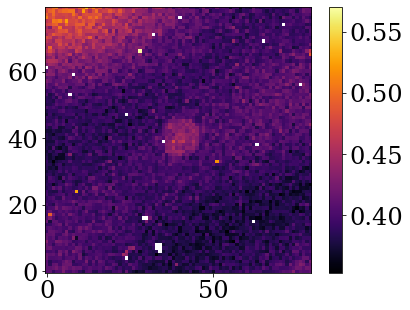

In [5]:
plt.imshow(exposures[0].err)
plt.colorbar()

In [6]:
params = {
    "fluxes": {},
    "positions": {},
    "slope": {},
    "contrast": {},
    #"separation": 6.,#18.,
    #"position_angle": 45.,#30.,#80.,#40.,
    "aberrations": {},
    "cold_mask_shift": {},
    "cold_mask_rot": {},
    "cold_mask_scale": {},
    "cold_mask_shear": {},
    "primary_scale": {},
    "primary_rot": {},
    "primary_shear": {},
    "outer_radius": 1.2*0.955,
    "secondary_radius": 0.372*1.2,
    "spider_width": 0.077*1.2,
    #"scale": 0.0434735,
    #"rot": 0.0
}

for exp in exposures:
    params["positions"][exp.fit.get_key(exp, "positions")] = np.asarray([0.,0.])#np.asarray([-6.,-7.])#np.asarray([-8.,-2.])#np.asarray([-6.,-7.])
    params["fluxes"][exp.fit.get_key(exp, "fluxes")] = np.log10(np.nansum(exp.data))
    params["slope"][exp.fit.get_key(exp, "slope")] = np.zeros(5)#.at[0].set(1)
    #params["aberrations"] = injected_params["aberrations"]
    params["aberrations"][exp.fit.get_key(exp, "aberrations")] = np.zeros(26)#jr.uniform(jr.key(0), (8,),minval=-4e-8, maxval=4e-8) #np.asarray([-8.59023084e-10,  1.77049982e-09, -4.45293089e-09, -3.70890613e-08,2.03658617e-08,  1.08092528e-08, -2.77077727e-09,  1.86458672e-09])*0.9#jr.uniform(jr.key(0), (8,),minval=-2e-8, maxval=2e-8)#np.zeros(8)#np.ones(8)*1e-8
    params["cold_mask_shift"][exp.fit.get_key(exp, "cold_mask_shift")] = np.asarray([0.06, 0.06])*1e2
    params["cold_mask_rot"][exp.fit.get_key(exp, "cold_mask_rot")] = 45.
    params["cold_mask_scale"][exp.fit.get_key(exp, "cold_mask_scale")] = np.asarray([1.,1.])
    params["cold_mask_shear"][exp.fit.get_key(exp, "cold_mask_shear")] = np.asarray([0.,0.])
    params["primary_rot"][exp.fit.get_key(exp, "primary_rot")] = 45.
    params["primary_scale"][exp.fit.get_key(exp, "primary_scale")] = np.asarray([1.,1.])
    params["primary_shear"][exp.fit.get_key(exp, "primary_shear")] = np.asarray([0.,0.])
    #params["contrast"][exp.fit.get_key(exp, "contrast")] = 1.


model = set_array(NICMOSModel(exposures, params, optics, detector))

params = ModelParams(params)

In [7]:
params

ModelParams(
  params={
    'fluxes':
    {'F110W': f32[]},
    'positions':
    {
      'na2a04maq':
      f32[2],
      'na2a04mbq':
      f32[2],
      'na2a04meq':
      f32[2],
      'na2a04mgq':
      f32[2],
      'na2a04mjq':
      f32[2],
      'na2a04mlq':
      f32[2],
      'na2a04moq':
      f32[2],
      'na2a04mqq':
      f32[2],
      'na2a04mtq':
      f32[2],
      'na2a04mvq':
      f32[2],
      'na2a04myq':
      f32[2],
      'na2a04n0q':
      f32[2],
      'na2a04n3q':
      f32[2],
      'na2a04n5q':
      f32[2],
      'na2a04n8q':
      f32[2],
      'na2a04naq':
      f32[2],
      'na2a04ndq':
      f32[2],
      'na2a04neq':
      f32[2]
    },
    'slope':
    {'F110W': f32[5]},
    'contrast':
    {},
    'aberrations':
    {
      'na2a04maq':
      f32[26],
      'na2a04mbq':
      f32[26],
      'na2a04meq':
      f32[26],
      'na2a04mgq':
      f32[26],
      'na2a04mjq':
      f32[26],
      'na2a04mlq':
      f32[26],
      'na2a04moq':
      f32

In [8]:
print(params.params)

{'fluxes': {'F110W': Array(4.4676757, dtype=float32)}, 'positions': {'na2a04maq': Array([0., 0.], dtype=float32), 'na2a04mbq': Array([0., 0.], dtype=float32), 'na2a04meq': Array([0., 0.], dtype=float32), 'na2a04mgq': Array([0., 0.], dtype=float32), 'na2a04mjq': Array([0., 0.], dtype=float32), 'na2a04mlq': Array([0., 0.], dtype=float32), 'na2a04moq': Array([0., 0.], dtype=float32), 'na2a04mqq': Array([0., 0.], dtype=float32), 'na2a04mtq': Array([0., 0.], dtype=float32), 'na2a04mvq': Array([0., 0.], dtype=float32), 'na2a04myq': Array([0., 0.], dtype=float32), 'na2a04n0q': Array([0., 0.], dtype=float32), 'na2a04n3q': Array([0., 0.], dtype=float32), 'na2a04n5q': Array([0., 0.], dtype=float32), 'na2a04n8q': Array([0., 0.], dtype=float32), 'na2a04naq': Array([0., 0.], dtype=float32), 'na2a04ndq': Array([0., 0.], dtype=float32), 'na2a04neq': Array([0., 0.], dtype=float32)}, 'slope': {'F110W': Array([0., 0., 0., 0., 0.], dtype=float32)}, 'contrast': {}, 'aberrations': {'na2a04maq': Array([0., 

In [9]:
def scheduler(lr, start, *args):
    shed_dict = {start: 1e10}
    for start, mul in args:
        shed_dict[start] = mul
    return optax.piecewise_constant_schedule(lr / 1e10, shed_dict)

base_sgd = lambda vals: optax.sgd(vals, nesterov=True, momentum=0.6)

opt = lambda lr, start, *schedule: base_sgd(scheduler(lr, start, *schedule))

base_adam = lambda vals: optax.adam(vals)
opta = lambda lr, start, *schedule: base_adam(scheduler(lr, start, *schedule))


def flatten(l):
    if isinstance(l, (tuple, list)):
         return [a for i in l for a in flatten(i)]
    else:
        return [l]



g = 2e-4

things = {
    "fluxes" : opt(g*100,20),
    "positions": opt(g*5, 0),
    "cold_mask_shift": opt(g*2000, 40),
    "cold_mask_scale": opt(g*500, 120),
    "cold_mask_rot": opt(g*500, 40),
    "cold_mask_shear": opt(g*500, 40),
    #"primary_scale": opt(g*1000, 200),
    #"primary_rot": opt(g*1000, 200),
    #"primary_shear": opt(g*1000, 200),
    "aberrations": opt(g*10,40),
    "slope": opt(g*1000, 60),
    #"separation": opt(g*30, 0),
    #"contrast": opt(g*20, 20),
    #"position_angle": opt(g*20, 0)
    #"rot": opt(g*100, 50),
    #"spider_width": opt(g*500, 60),
}

#g = 2e-3

g = 2e-3

things = {
    "fluxes" : opt(g*20,10),
    "positions": opt(g*3, 0),
    #"positions": opt(g*200, 0),
    "cold_mask_shift": opt(g*100, 120),
    "cold_mask_rot": opt(g*100, 120),
    "cold_mask_scale": opt(g*1000, 150),
    "cold_mask_shear": opt(g*10, 150),
    #"primary_scale": opt(g*100, 150),
    #"primary_rot": opt(g*100, 150),
    #"primary_shear": opt(g*100, 150),
    "aberrations": opt(g*10,120),
    "slope": opt(g*20, 50),
    #"softening": opt(g*1e3, 200),
    #"breathing": opt(g*1000,150),
    #"rot": opt(g*100, 50),
}

groups = list(things.keys())
paths = flatten(groups)
optimisers = [things[i] for i in groups]
groups = [list(x) if isinstance(x, tuple) else x for x in groups]

In [10]:
@zdx.filter_jit
@zdx.filter_value_and_grad(paths)
def loss_fn(params,exposures):
    mdl = params.inject(model)
    return np.nansum(np.asarray([posterior(mdl,exposure) for exposure in exposures]))


In [11]:
rc = False
fishers = calc_fishers(model, exposures, paths, recalculate=rc)
lrs = calc_lrs(model, exposures, fishers, paths)

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [12]:
lrs.params

{'aberrations': {'na2a04maq': Array([0.00059434, 0.0003753 , 0.00031563, 0.00055471, 0.00059978,
         0.00066765, 0.00067125, 0.0008068 , 0.00032082, 0.00039853,
         0.00047869, 0.00041997, 0.00058911, 0.00056331, 0.00044402,
         0.00044197, 0.00052388, 0.00052948, 0.00042585, 0.00040268,
         0.00032299, 0.00030989, 0.00035738, 0.00053864, 0.00045782,
         0.00047692], dtype=float32),
  'na2a04mbq': Array([0.00059142, 0.00037432, 0.00031501, 0.00055758, 0.00058107,
         0.00065923, 0.00066572, 0.00080258, 0.00031887, 0.00039578,
         0.00047629, 0.00041799, 0.00057794, 0.00056367, 0.0004408 ,
         0.00043812, 0.00052118, 0.00052717, 0.00042456, 0.00040067,
         0.00032164, 0.00030854, 0.00035585, 0.00053721, 0.00045632,
         0.00047763], dtype=float32),
  'na2a04meq': Array([0.00053357, 0.0003378 , 0.00028677, 0.00047516, 0.00050945,
         0.00056509, 0.00056599, 0.00072077, 0.00028882, 0.00035623,
         0.00043341, 0.00037986, 0.0005154

In [13]:
optim, opt_state = zdx.get_optimiser(
    params, groups, optimisers
)


losses, models = [], []
for i in tqdm(range(400)):
    loss, grads = loss_fn(params,exposures)
    grads = jtu.tree_map(lambda x, y: x * np.abs(y), grads, ModelParams(lrs.params))
    updates, opt_state = optim.update(grads, opt_state)
    params = zdx.apply_updates(params, updates)

    models.append(params)
    losses.append(loss)


  0%|          | 0/400 [00:00<?, ?it/s]

In [14]:
model


NICMOSModel(
  params={
    'aberrations':
    {
      'na2a04maq':
      f32[26],
      'na2a04mbq':
      f32[26],
      'na2a04meq':
      f32[26],
      'na2a04mgq':
      f32[26],
      'na2a04mjq':
      f32[26],
      'na2a04mlq':
      f32[26],
      'na2a04moq':
      f32[26],
      'na2a04mqq':
      f32[26],
      'na2a04mtq':
      f32[26],
      'na2a04mvq':
      f32[26],
      'na2a04myq':
      f32[26],
      'na2a04n0q':
      f32[26],
      'na2a04n3q':
      f32[26],
      'na2a04n5q':
      f32[26],
      'na2a04n8q':
      f32[26],
      'na2a04naq':
      f32[26],
      'na2a04ndq':
      f32[26],
      'na2a04neq':
      f32[26]
    },
    'cold_mask_rot':
    {'F110W': f32[]},
    'cold_mask_scale':
    {'F110W': f32[2]},
    'cold_mask_shear':
    {'F110W': f32[2]},
    'cold_mask_shift':
    {'F110W': f32[2]},
    'contrast':
    {},
    'fluxes':
    {'F110W': f32[]},
    'outer_radius':
    f32[],
    'positions':
    {
      'na2a04maq':
      f32[2],
     

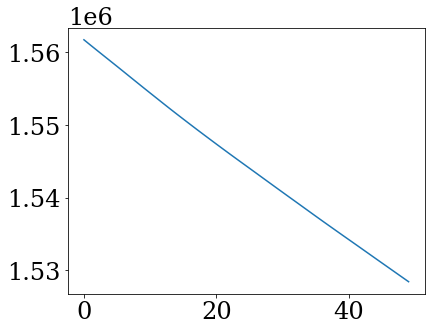

In [15]:
plt.plot(losses[-50:])

In [16]:
params.params

{'aberrations': {'na2a04maq': Array([-3.4613640e+00,  1.3746942e+00, -4.0992823e-01,  1.9001441e+00,
          4.7089177e-01,  1.3805687e+00, -1.5478329e-01, -5.3081827e+00,
         -7.7742189e-01,  1.7354238e+00, -5.2615372e-03, -5.9356892e-01,
         -6.8424850e+00,  1.2302564e+00, -1.7029957e-01, -1.6855479e+00,
          4.5247027e-01, -5.6742829e-01, -2.9054072e-01,  1.7663713e-01,
         -5.3306758e-01,  2.8076172e-01, -2.9793477e-01,  3.6835903e-01,
          2.5549418e-01, -9.3512332e-01], dtype=float32),
  'na2a04mbq': Array([-3.1101003e+00,  1.2409010e+00, -3.0732059e-01,  2.1233704e+00,
          1.4203440e+00,  1.5079621e+00, -1.6008928e-01, -4.8676910e+00,
         -7.8738582e-01,  1.5480528e+00, -9.8382216e-04, -5.4598236e-01,
         -6.2923160e+00,  1.0136853e+00, -3.2444713e-01, -1.6354183e+00,
          5.0244963e-01, -1.1718303e+00, -2.3906629e-01,  2.1294819e-01,
         -4.5270321e-01,  2.8194705e-01, -4.1085705e-01,  6.1805224e-01,
          3.7495506e-01, 

8


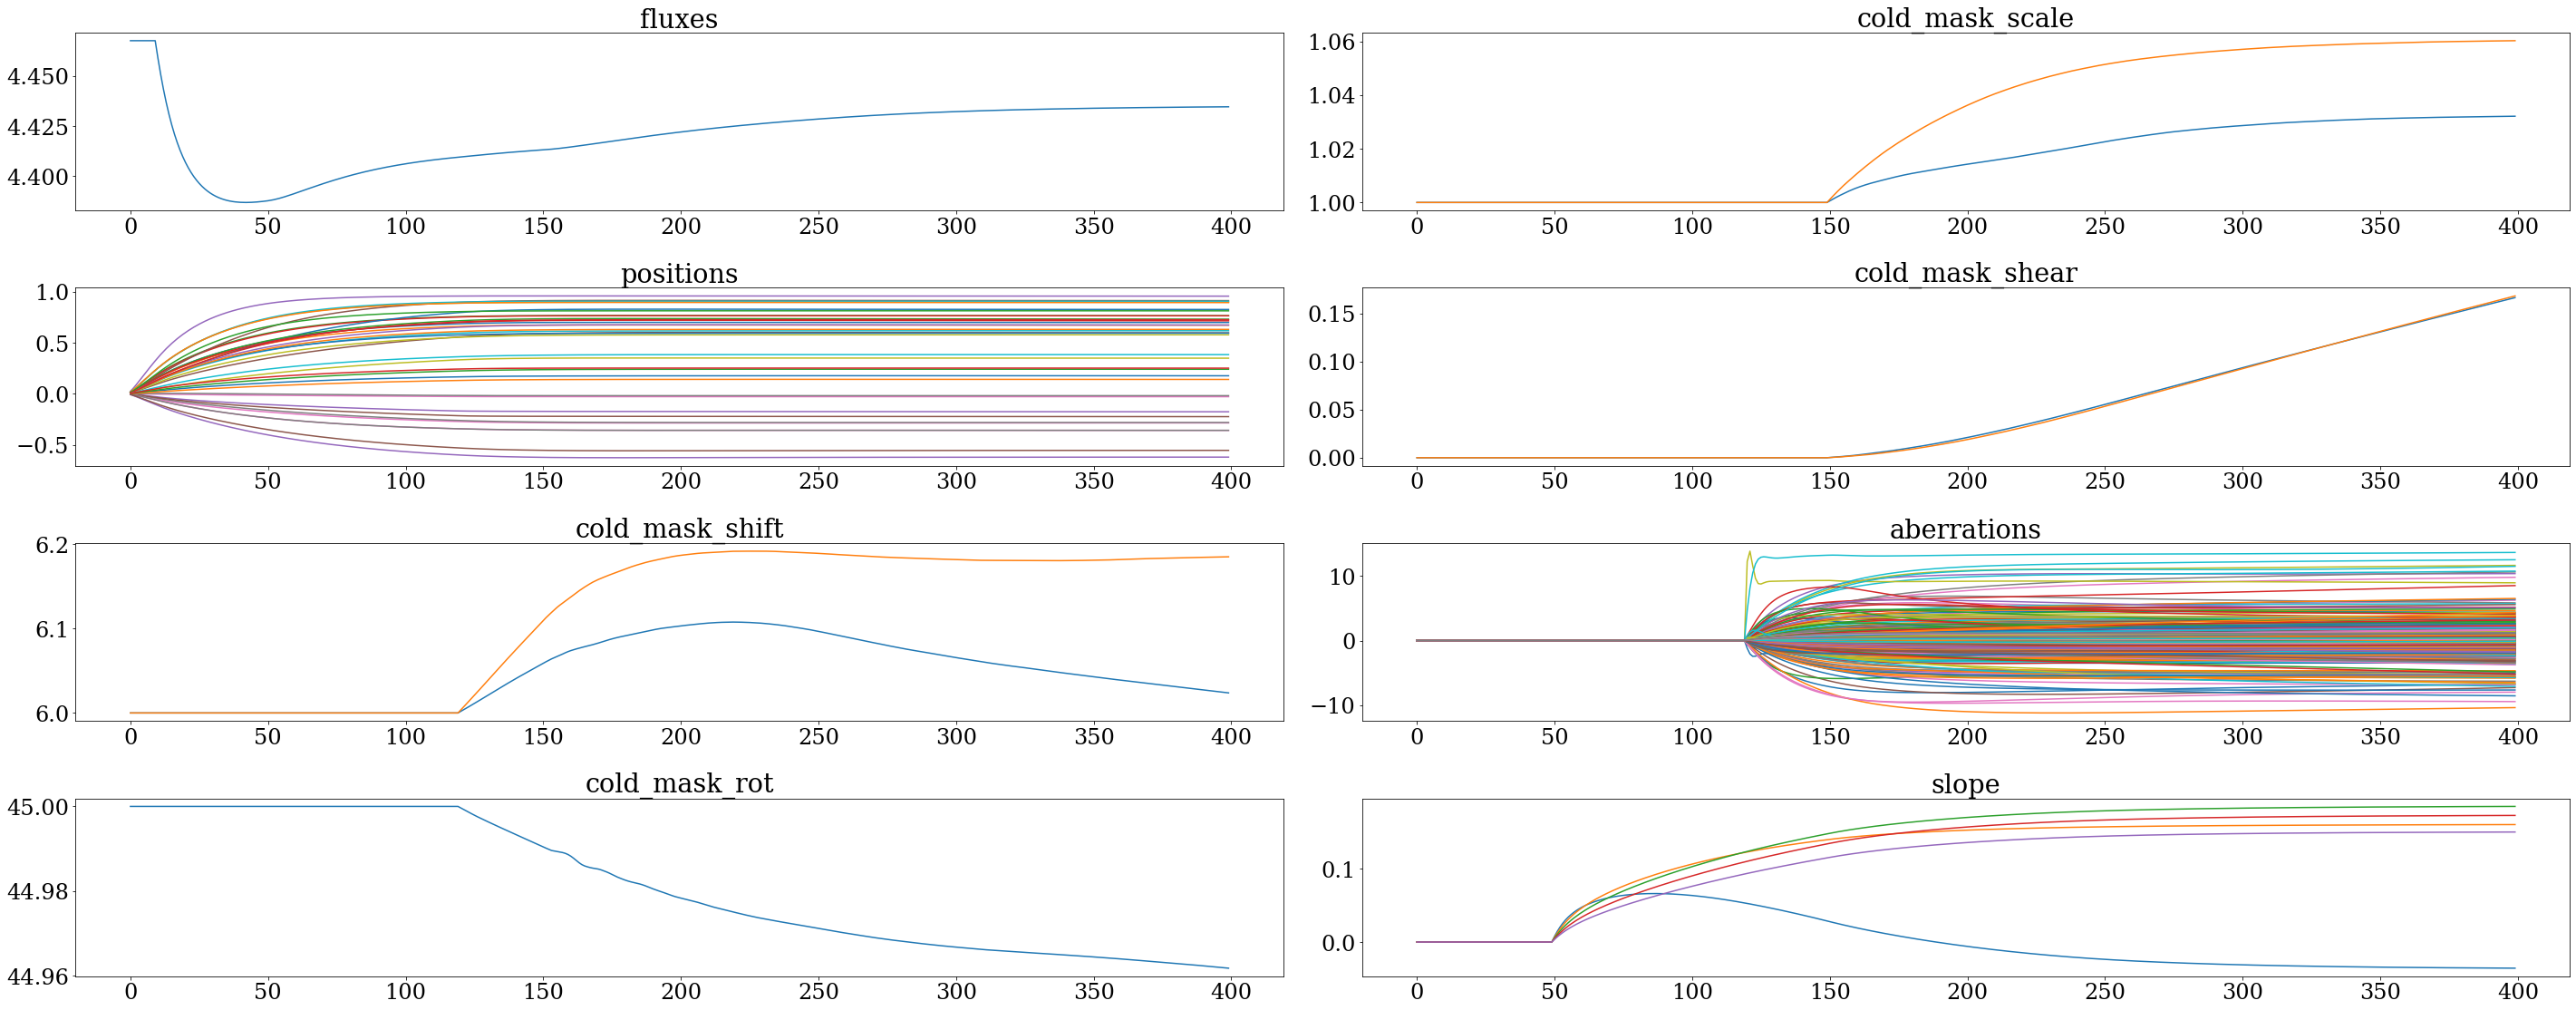

In [17]:
xw = 4
yw = int(np.ceil(len(groups)/xw))

print(len(groups))


fig, axs = plt.subplots(xw,yw,figsize=(xw*10,yw*8))
for i, param in enumerate(groups):
    #print(param)
    sp = axs[i%xw, i//xw]
    if param in ["fluxes", "contrast", "positions", "aberrations", 
                 "cold_mask_shift", "cold_mask_rot", "cold_mask_scale", "cold_mask_shear",
                 "primary_rot","primary_scale", "primary_shear", "slope"]:
        #print(np.asarray(list(models_s[0].get(param).values())))
        #print(injected_params[param])
        """for j in injected_params[param].values():
            print(j)
            print(len(j.shape))
            if len(j.shape)>0:
                for k in j:
                    sp.axhline(k, color='k', linestyle='--')
            else:
                sp.axhline(j, color='k', linestyle='--')"""
        for p in np.asarray([np.asarray(list(x.get(param).values())) for x in models]).T:
            if len(p.shape)>1:
                for i in range(p.shape[0]):
                    sp.plot(p[i,:])
            else:
                sp.plot(p)
            sp.set_title(param)
    else:
        sp.set_title(param)
        sp.plot([x.get(param) for x in models])
        #sp.axhline(injected_params[param], color='k', linestyle='--')

    
fig.tight_layout()

In [117]:
params = models[-1]

4.134655e+08, 1.528451e+06


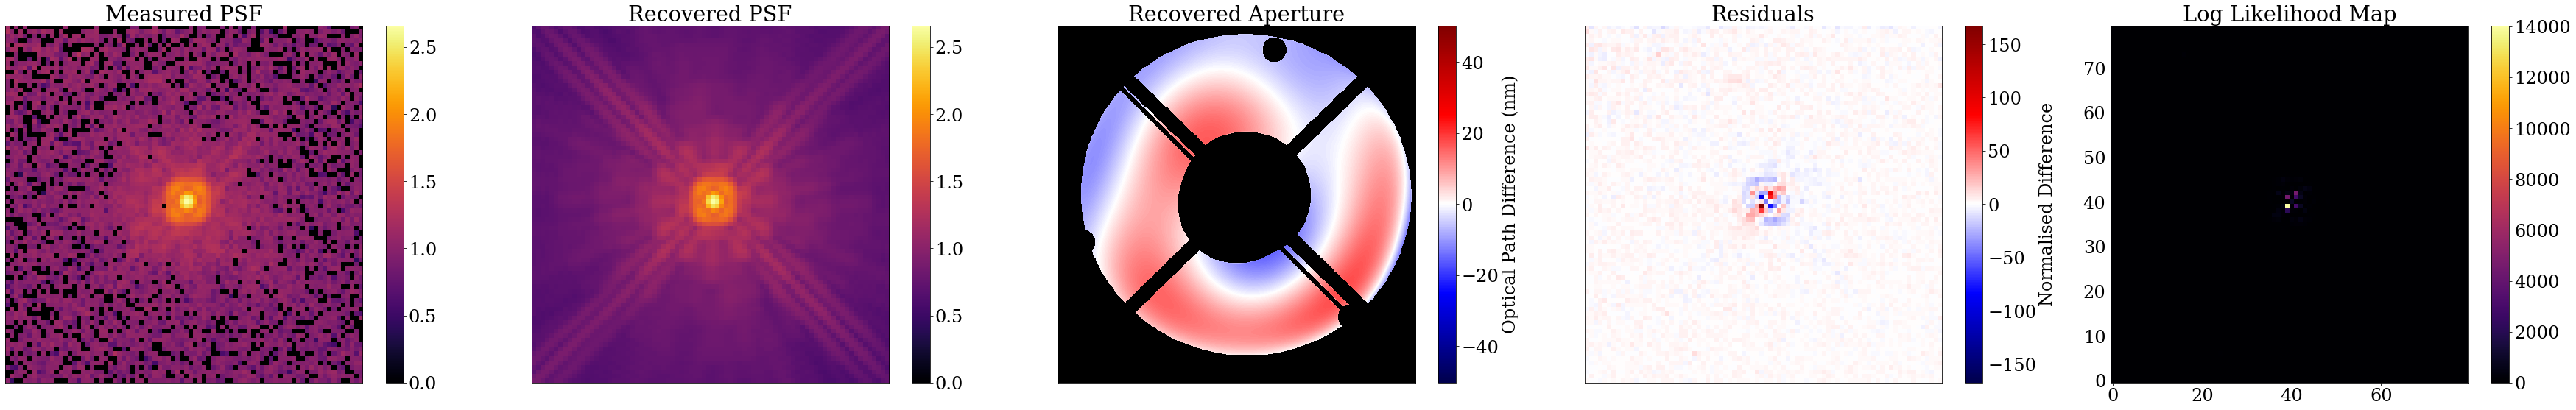

In [119]:
print(f"{float(losses[0]):e}, {float(losses[-1]):e}")

fig, axs = plt.subplots(1,5, figsize=(50,8))

fig.tight_layout()

cmap = matplotlib.colormaps['inferno']
cmap.set_bad('k',1)

#vm = max(np.max(cropped_data),np.max(telescope.model()))

exp = exposures[0]

model = params.inject(model)

coords = dlu.pixel_coords(512, 2.4)
cropped_frame = exp.data**0.125
telescope_frame = exp.fit(model,exp)**0.125

vm = max(np.nanmax(cropped_frame),np.nanmax(telescope_frame))
cd=axs[0].imshow(cropped_frame, vmin=0,vmax=vm,cmap=cmap)
plt.colorbar(cd,ax=axs[0])
tl=axs[1].imshow(telescope_frame, vmin=0, vmax=vm,cmap=cmap)
plt.colorbar(tl,ax=axs[1])
#axs[2].imshow(cropped_err)
cmap = matplotlib.colormaps['seismic']
cmap.set_bad('k',1)

optics = exp.fit.update_optics(model, exp)

support = optics.transmission(coords,2.4/512)
support_mask = support.at[support < .5].set(np.nan)

opd = optics.AberratedAperture.eval_basis(coords)*1e9
olim = np.max(np.abs(opd))
apt =axs[2].imshow(support_mask*opd,cmap=cmap,vmin=-olim, vmax=olim)
plt.colorbar(apt, ax=axs[2]).set_label("Optical Path Difference (nm)")
#axs[4].imshow(telescope.detector.pixel_response.pixel_response)
resid = (exp.data - exp.fit(model,exp))/exp.err
rlim = np.nanmax(np.abs(resid))
resid=axs[3].imshow(resid, cmap='seismic',vmin=-rlim, vmax=rlim)
plt.colorbar(resid,ax=axs[3]).set_label("Normalised Difference")

"""def pix2rad(x):
    return dlu.arcsec2rad(x*0.0432)

def rad2pix(x):
    return dlu.rad2arcsec(x)/0.0432

positions = dlu.positions_from_sep(
        pix2rad(model.get(exp.map_param("positions"))),
        pix2rad(model.params["separation"]),
        dlu.deg2rad(model.params["position_angle"])
    )

for i in range(2):
    x, y = rad2pix(positions[i]) + wid/2 - 0.5
    axs[3].axvline(x, color='gk'[i],linestyle='--')
    axs[3].axhline(y, color='gk'[i],linestyle='--')
"""

lpdf = posterior(model,exp,return_im=True)#*nanmap
lpd = axs[4].imshow(lpdf)
plt.colorbar(lpd, ax=axs[4])

axs[0].set_title("Measured PSF")
axs[1].set_title("Recovered PSF")
axs[2].set_title("Recovered Aperture")
axs[3].set_title("Residuals")
axs[4].set_title("Log Likelihood Map")


for i in range(4):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

#axs[1].imshow(telescope.optics.aberrations.eval_basis(coords)*1e9)
plt.show()
#plt.imshow(np.abs(telescope.model()-cropped_data)**0.25)


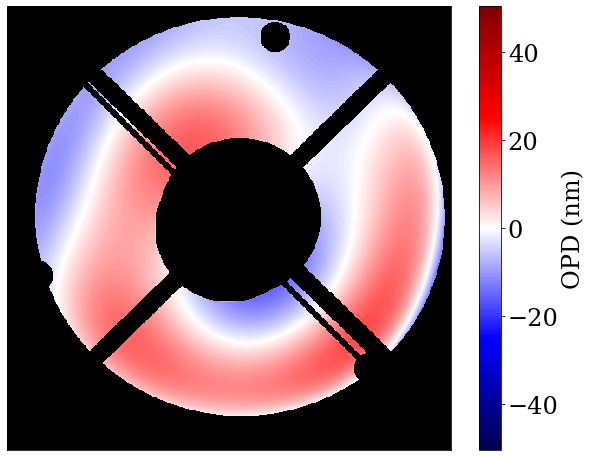

In [103]:
plt.figure(figsize=(10,8))
opd = optics.AberratedAperture.eval_basis(coords)*1e9
olim = np.max(np.abs(opd))
apt =plt.imshow(support_mask*opd,cmap=cmap,vmin=-olim, vmax=olim)
plt.colorbar(label = "OPD (nm)")
plt.xticks([])
plt.yticks([])
plt.savefig("aperture.png", transparent=True)

In [19]:
#resid = (exp.data - exp.fit(model,exp))/exp.data
#print(np.nanmedian(np.abs(resid[50:-50,50:-50])))
#plt.imshow((np.abs(resid[50:-50,50:-50])))
#plt.colorbar()

In [20]:
paths

['fluxes',
 'positions',
 'cold_mask_shift',
 'cold_mask_rot',
 'cold_mask_scale',
 'cold_mask_shear',
 'aberrations',
 'slope']

In [21]:
fsh = calc_fishers(model, exposures, ["aberrations"], recalculate=True, save=False)


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
uncs = []
for exp in fsh.keys():
    print(np.diag(np.linalg.inv(fsh[exp]["aberrations"]*80*80)))
    uncs.append(np.sqrt(abs(np.linalg.inv(fsh[exp]["aberrations"])[0,0])))
uncs = np.asarray(uncs)
uncs

[-6.75844058e-05 -2.68103267e-05  1.60994132e-05  4.40042140e-06
 -3.04208982e-07 -2.13057683e-05 -5.59320051e-06  2.06863042e-05
  8.32092064e-06  1.04873578e-07  1.31314573e-06 -2.28285671e-06
 -3.51014592e-07 -2.20523006e-07 -3.72260979e-06 -1.58146722e-05
 -2.77140907e-06  3.03885918e-06 -9.21674582e-05 -5.81779025e-09
  4.27811892e-06 -1.13674705e-05 -2.38812572e-06 -8.28412522e-06
  2.05164088e-05  1.78591072e-05]
[-3.9585982e-04 -1.8966767e-04  1.2868026e-05  3.3218287e-06
 -2.9164971e-06 -1.7611215e-04 -3.3619363e-05 -1.1309158e-05
 -2.5012464e-06 -4.1706106e-05 -9.4846482e-06 -4.9575461e-05
 -4.9833279e-06 -4.6048717e-06 -2.4134073e-05 -1.0247455e-04
 -1.3821488e-05  9.0739974e-07 -4.2511855e-04 -2.8173125e-05
  3.5312789e-06 -5.7578000e-05 -3.8931994e-05 -1.9216866e-05
  1.2384287e-05  2.3149134e-06]
[ 5.2457177e-05  2.5852389e-05  1.0255599e-05  1.5735000e-06
  4.6245736e-07  8.4186104e-06  5.2758031e-05  1.7581448e-05
  1.7017121e-05  1.8234656e-05 -2.8148394e-05  2.8791494

Array([0.6576914 , 1.5916176 , 0.57941073, 0.5325583 , 0.2597456 ,
       0.3017965 , 0.20467965, 0.5476205 , 0.23297745, 0.23604517,
       1.0965072 , 0.6508182 , 0.23675855, 0.22866185, 0.24031836,
       0.2764477 , 1.4982517 , 0.42622995], dtype=float32)

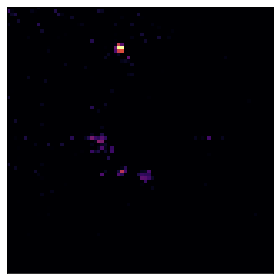

In [114]:
res = 0.0
for exp in exposures[:16]:#[:10]+exposures[11:]:
    res = res + np.nan_to_num(exp.data - exp.fit(model, exp), 0.0)/len(exposures)

res = res.at[32:48,32:48].set(0.0)

#res = res.at[45:55,45:55].set(0.0)

#res = res.at[28:36,52:60].set(0.0)


m = np.max(np.abs(res))

prms = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(prms)

plt.imshow((res), cmap='inferno', vmax=m, vmin=1)
plt.xticks([])
plt.yticks([])
#plt.colorbar()
plt.savefig("browndwarf.png", transparent=True)

941.0542


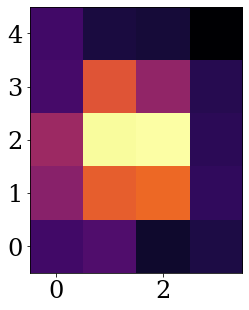

In [52]:
#plt.imshow(res[21:25,64:68])
#print(10**4.9665546 / np.sum(res[21:25,64:68]))
# gives 2223.365 for N458

plt.imshow(res[65:70, 32:36])
print(10**4.4365478 / np.sum(res[65:70, 32:36]))


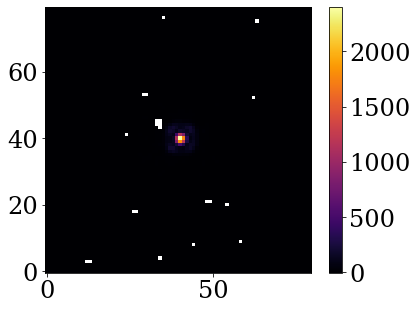

In [53]:
plt.imshow(exp.data)
plt.colorbar()

{'ytick.color': 'w',
 'xtick.color': 'w',
 'axes.labelcolor': 'w',
 'axes.edgecolor': 'w'}

0.06597222222222222


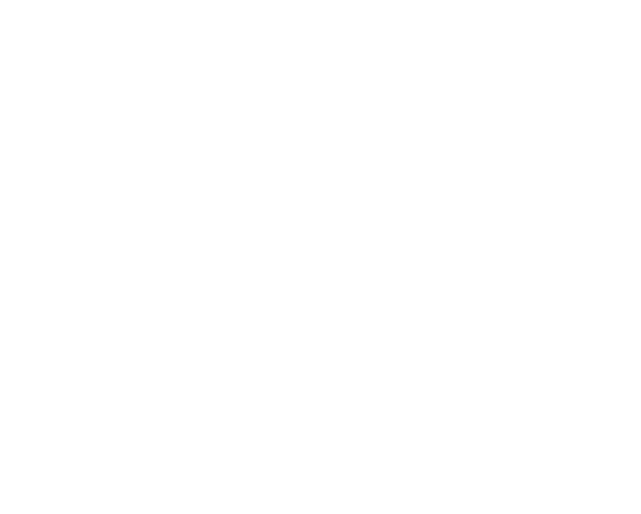

In [113]:
#orbit = 95/(24*60)

defocus = [x[0] for x in models[-1].params["aberrations"].values()][:16]
mjd = [exp.mjd for exp in exposures][:16]

mjd = [(x - mjd[0])*24*60 for x in mjd]

print(95/(24*60))

plt.figure(figsize=(10,8))
plt.errorbar(mjd, defocus, uncs[:16], marker="o",linestyle='none', color='w', markersize = 12)
#plt.scatter(mjd,defocus)
plt.xlabel("Time (minutes)")
plt.ylabel("Defocus (nm)")
plt.savefig("breathing.png", transparent=True)

In [71]:
from sklearn.decomposition import PCA

abb = np.asarray([x for x in params.params["aberrations"].values()])#.transpose()
print(abb.shape)

pca = PCA(n_components=5)
pca.fit(abb)
print(pca.singular_values_)
print(pca.components_)
print(pca.explained_variance_)
components = pca.components_

(18, 26)
[43.383503 16.23908  13.514717 10.022764  6.569126]
[[ 0.35591358 -0.10770081  0.01081711 -0.44714993  0.44067425 -0.10728639
  -0.16255562  0.4199969   0.03644141 -0.13752158  0.05638389  0.03061281
   0.33898342 -0.28975713  0.00439704 -0.06643495 -0.02016703 -0.01296801
   0.06041909 -0.00606426  0.02923409  0.0022453   0.03113999 -0.01317723
   0.013189    0.1379954 ]
 [-0.10905993  0.03573636  0.13051914 -0.28062713  0.2850895   0.27500218
  -0.398676   -0.35432327  0.16954643  0.12210174 -0.00858292 -0.06329802
   0.08098871  0.49278513  0.26133293 -0.06299858 -0.04099637 -0.18200108
   0.05193867 -0.06202441  0.01765666  0.05900644 -0.06353889  0.05712078
   0.06467178  0.15372592]
 [ 0.05976307 -0.06322807  0.16944507  0.5485252   0.39206368 -0.01405576
   0.13951987  0.24777652  0.12205109 -0.14410037 -0.0696949   0.05583147
   0.20283532  0.34006768 -0.0275795   0.08917084  0.18416142 -0.11304986
   0.24299599 -0.16165465  0.02143862  0.00606543 -0.10416984  0.081343

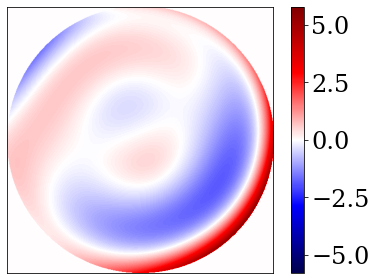

In [70]:
ap = dl.AberratedAperture(dl.CircularAperture(radius=1.2), noll_inds=np.arange(4,30), coefficients=components[0])
coords = dlu.pixel_coords(512, 2.4)

opd = ap.eval_basis(coords)#*1e9
m = np.max(np.abs(opd))
plt.imshow(opd, cmap='seismic', vmin=-m, vmax=m)
plt.xticks([])
plt.yticks([])
plt.colorbar()


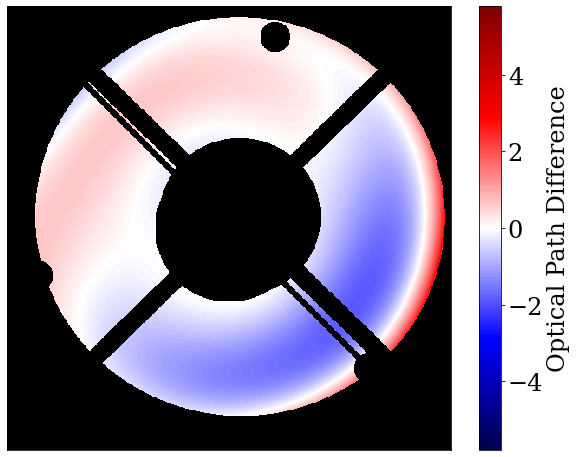

In [115]:
plt.figure(figsize=(10,8))
cmap = matplotlib.colormaps['seismic']
cmap.set_bad('k',1)

ap = dl.AberratedAperture(dl.CircularAperture(radius=1.2), noll_inds=np.arange(4,30), coefficients=components[0])

opd = ap.eval_basis(coords)#*1e9
m = np.max(np.abs(opd))
plt.imshow(opd*support_mask, cmap=cmap, vmin=-m, vmax=m)
plt.xticks([])
plt.yticks([])
plt.colorbar(label="Optical Path Difference")